<a href="https://colab.research.google.com/github/Shalu31/30-days--30-project-in-AI/blob/main/brain_tumor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/Tumour

/content/drive/.shortcut-targets-by-id/1C9ww4JnZ2sh22I-hbt45OR16o4ljGxju/Tumour


In [14]:
data_dir = '/content/drive/MyDrive/Tumour'

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1955 images belonging to 3 classes.
Found 488 images belonging to 3 classes.


In [16]:
test_df = '/content/drive/MyDrive/Tumour/test'
train_df = '/content/drive/MyDrive/Tumour/train'

In [17]:
test_df

'/content/drive/MyDrive/Tumour/test'

In [20]:
train_paths = []
train_labels = []
for label in os.listdir(train_df):
  for image_path in glob.glob(os.path.join(train_df, label, '*')):
    train_paths.append(image_path)
    train_labels.append(label)
from sklearn.utils import shuffle
train_paths,train_labels = shuffle(train_paths,train_labels)
train_paths

['/content/drive/MyDrive/Tumour/train/glioma/Tr-gl_0135_jpg.rf.3e7bf59164e49b741ee00122213f94cd.jpg',
 '/content/drive/MyDrive/Tumour/train/meningioma/Tr-me_0051_jpg.rf.2076d05699720608ccdd6d40799d100a.jpg',
 '/content/drive/MyDrive/Tumour/train/no_tumor/Tr-no_0376_jpg.rf.c6e3263883aab175a0e3625c1ed86209.jpg',
 '/content/drive/MyDrive/Tumour/train/glioma/Tr-gl_0344_jpg.rf.6ee7ad0ef821653b01aa9f608545ae84.jpg',
 '/content/drive/MyDrive/Tumour/train/no_tumor/Tr-no_0328_jpg.rf.c2b60275a12f7d3c32389512f22a4ffe.jpg',
 '/content/drive/MyDrive/Tumour/train/glioma/Tr-gl_0076_jpg.rf.58ab815342a7fd013913e585834779f1.jpg',
 '/content/drive/MyDrive/Tumour/train/pituitary/Tr-pi_0613_jpg.rf.8c839d2ed084bb495c21888667b2960a.jpg',
 '/content/drive/MyDrive/Tumour/train/no_tumor/Tr-no_0401_jpg.rf.3accc97a810219ba9abcda182934f051.jpg',
 '/content/drive/MyDrive/Tumour/train/pituitary/Tr-pi_0571_jpg.rf.7ff710d6b45ef207a78ebb3c65016058.jpg',
 '/content/drive/MyDrive/Tumour/train/meningioma/Tr-me_0174_jpg.rf

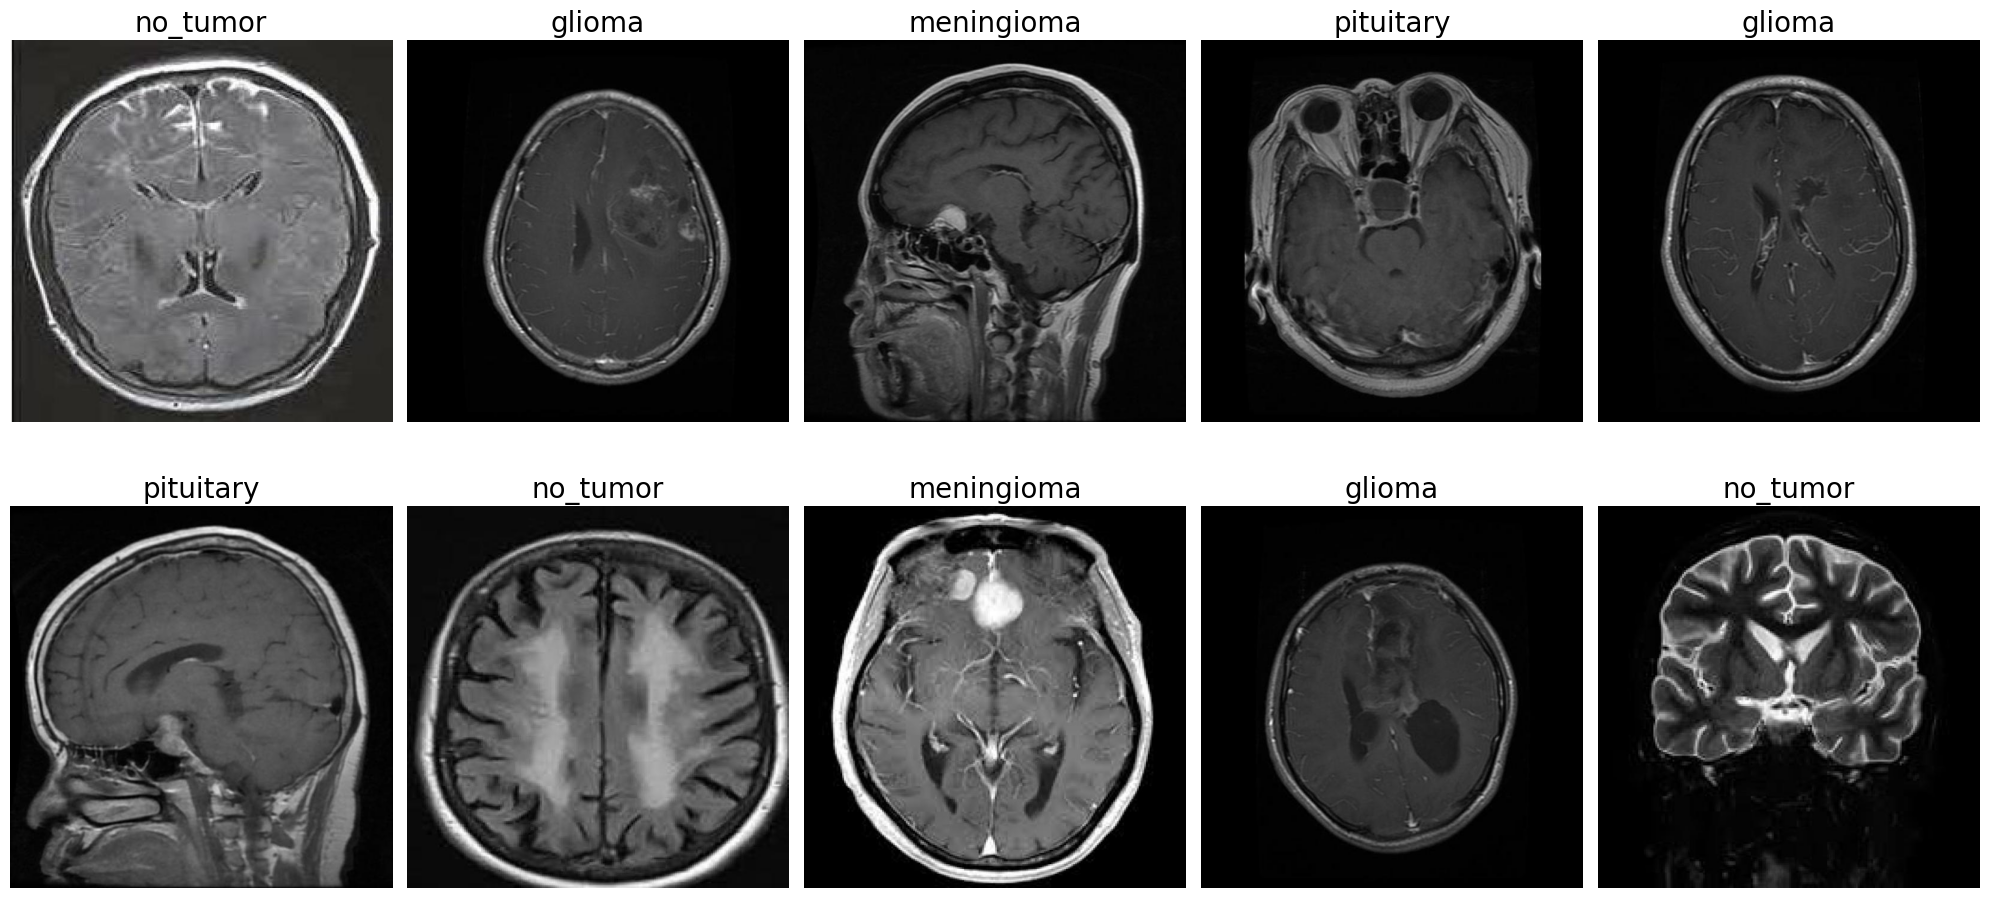

In [25]:
import random
import matplotlib.pyplot as plt
random_indices = random.sample(range(len(train_paths)), 10)
random_indices
fig,axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()
for i,index in enumerate(random_indices):
  image = cv2.imread(train_paths[index])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  axes[i].imshow(image)
  axes[i].set_title(train_labels[index], fontsize = 20)
  axes[i].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def augement_image(image):
  pass
def open_images(paths):
  pass
def encode_labels(labels):
  pass
def datagen(paths,labels,batch_size= 12, epochs = 1):
  pass

In [27]:
import os
len(os.listdir(train_df))

5

In [ ]:
IMAGE_SIZE= 128
base_model = tf.keras.applications.ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
for layer in base_model.layers:
  layer.trainable = False
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
